In [1]:
%matplotlib inline
import weak_sauce as ws
import weak_sauce.data_tools
import numpy as np
import matplotlib.pyplot as plt
from __future__ import division

from weak_sauce.movers import UniformGaussianMover
from weak_sauce.grid import MoveableGrid
from weak_sauce.sources import Source
from weak_sauce.movers import UniformIlluminationMover, FixedIlluminationMover
from weak_sauce.fit_flat import FlatFitter

def gauss(centroids, mu=np.array([0, 0]), sigma=np.array([1., 1.])):
    return np.exp(-0.5 * np.sum(np.square((centroids - mu) / sigma), axis=2)) / \
           (2 * np.pi * np.prod(sigma))

To assess the science impact of pixel size variation in LSST sensors, we will need to lay down sources with the following varying properties:
* focal plane position ( x in [50,3950]; y in [50,3950] with half-pixel step size 
* ellipticity of source ( e in [0,1])
* orientation of source (theta in [0,180 degrees])

Steps (first over small section of chip):
1. Fit a model to an LSST ultraflat
2. For src_prop in {above}: lay down a source on the fitted model
3. Use moments code to record "observed" moments.

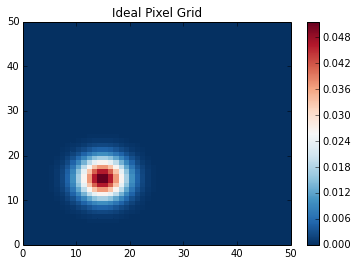

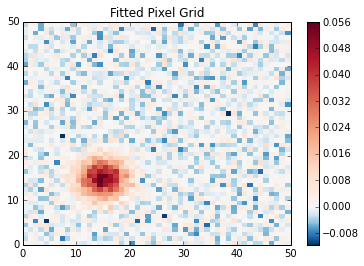

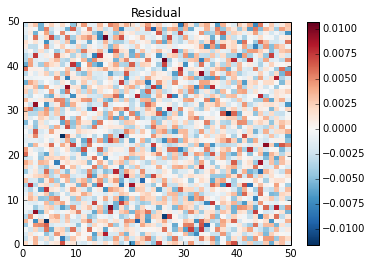

In [107]:
from weak_sauce.adaptive_moments.psf_evaluator import Moment_Evaluator

temp = MoveableGrid('test100k_iter.pkl')
n_verts_x = 51

stationary_source = Source(num_x=n_verts_x, flux_func=gauss, mu=(15,15),sigma=3)
illuminator = FixedIlluminationMover(stationary_source)

ideal_grid = Source(num_x=n_verts_x)
ideal_mg = MoveableGrid(ideal_grid,illuminator)
ideal_mg.step()
ideal_mg.plot_real_grid()
plt.title('Ideal Pixel Grid')

temp.source.fluxes -= 1
temp.source.psf_evaluator = Moment_Evaluator(num_iter_max = 1000)
mg = MoveableGrid(temp.source, illuminator)
mg.step()
mg.plot_real_grid()
plt.title('Fitted Pixel Grid')

ideal_source.plot(mg.source.fluxes-ideal_mg.source.fluxes)
plt.title('Residual')

In [108]:
#temp.source.psf_evaluator = Moment_Evaluator(num_iter_max = 1000000, bound_correct_wt = 0.25, epsilon=1e-10)
mg.evaluate_psf()

,Mx,Mxx,Mxy,My,Myy,a4,delta1,delta2,e0,e0prime,e1,e2,flux,fwhm,phi,w,w1,w2,wd1,wd2,
0,14.493736,8.912762,-0.006956,14.505734,9.040687,0.001731,0.000527,-0.001346,0.654403,1.30879,-0.004663,-0.000507,1.498841,2.99608,-1.516631,0.068486,0.003708,-0.068386,0.104182,-0.043935,...


In [109]:
ideal_mg.evaluate_psf()

,Mx,Mxx,Mxy,My,Myy,a4,delta1,delta2,e0,e0prime,e1,e2,flux,fwhm,phi,w,w1,w2,wd1,wd2,
0,14.5,9,1.316370e-10,14.5,9,-1.793143e-08,-5.039878e-10,6.931687e-10,0.6561,1.3122,-4.350955e-10,9.596344e-12,1.5,3,1.55977,0.000021,0,0.000021,0.000706,0.000636,...


In [111]:
import pandas as pd
res_df = pd.DataFrame()
ideal_df = pd.DataFrame()
n_verts_x = 51


for xctr in np.arange(20,31):
    for yctr in np.arange(20,31):
        temp = MoveableGrid('test100k_iter.pkl')

        stationary_source = Source(num_x=n_verts_x, flux_func=gauss, mu=(xctr,yctr),sigma=3)
        #stationary_source.fluxes *= 10
        illuminator = FixedIlluminationMover(stationary_source)

        ideal_grid = Source(num_x=n_verts_x)
        ideal_mg = MoveableGrid(ideal_grid,illuminator)
        ideal_mg.step()
        ideal_res = ideal_mg.evaluate_psf()
        ideal_df = ideal_df.append(ideal_res)
        
        temp.source.fluxes -= 1
        mg = MoveableGrid(temp.source, illuminator)
        mg.step()
        fitted_res = mg.evaluate_psf()
        res_df = res_df.append(fitted_res)

KeyboardInterrupt: 

In [114]:
resid_df = res_df-ideal_df

In [118]:
resid_df.describe()

,Mx,Mxx,Mxy,My,Myy,a4,delta1,delta2,e0,e0prime,e1,e2,flux,fwhm,phi,w,w1,w2,wd1,wd2,
count,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,...
mean,-0.000444,0.004919,-0.004243,-0.003119,0.007406,-0.000153,-0.000086,-0.000102,0.000449,0.000895,-0.000091,-0.000309,0.000278,0.001015,-1.650021,0.043419,0.025032,-0.001767,0.105974,-0.001731,...
std,0.003768,0.044263,0.014743,0.002179,0.026428,0.003186,0.001905,0.001701,0.001748,0.003498,0.002001,0.001075,0.001541,0.003999,0.990115,0.012205,0.018717,0.032801,0.026796,0.075529,...
min,-0.007910,-0.090633,-0.043516,-0.006698,-0.077854,-0.004254,-0.003590,-0.004423,-0.003304,-0.006616,-0.003787,-0.003172,-0.003801,-0.007582,-3.129967,0.012506,0.000025,-0.058742,0.053908,-0.122408,...
25%,-0.004490,-0.029480,-0.011294,-0.005075,-0.002204,-0.002683,-0.001571,-0.001238,-0.001007,-0.002017,-0.001379,-0.000823,-0.000638,-0.002312,-2.430513,0.035317,0.007223,-0.026357,0.081307,-0.064155,...
50%,0.000233,0.007434,-0.003649,-0.003183,0.012716,-0.000686,-0.000199,-0.000193,0.000454,0.000905,-0.000082,-0.000266,0.000436,0.001031,-1.742395,0.044988,0.022131,-0.006358,0.105849,-0.010151,...
75%,0.002602,0.041936,0.006480,-0.001391,0.026778,0.001262,0.001599,0.001088,0.001962,0.003921,0.001315,0.000472,0.001478,0.004475,-0.980749,0.052184,0.039321,0.021999,0.131823,0.064545,...
max,0.005557,0.091985,0.024694,0.002747,0.045724,0.008584,0.002868,0.002995,0.003714,0.007423,0.004464,0.001800,0.002904,0.008469,0.002113,0.066921,0.066877,0.061764,0.148476,0.131310,...


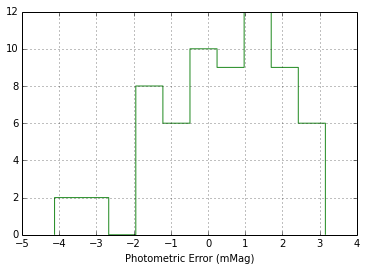

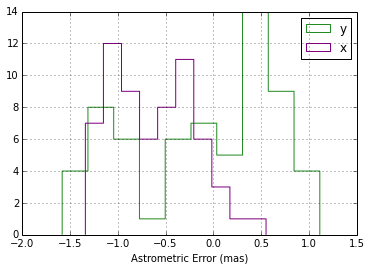

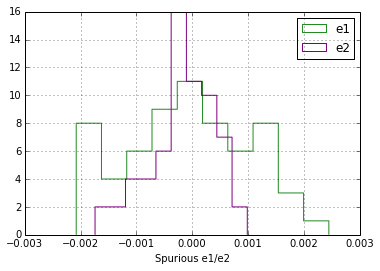

In [142]:
(resid_df['flux']/(.001*np.log(10)/2.5)).hist(bins=10,histtype='step',color='ForestGreen') #convert %flux to mMag
plt.xlabel('Photometric Error (mMag)')
plt.figure()
(200*resid_df['Mx']).hist(bins=10,histtype='step',color='ForestGreen',label='y') #LSST pixel size
(200*resid_df['My']).hist(bins=10,histtype='step',color='Purple',label='x')
plt.legend()
plt.xlabel('Astrometric Error (mas)')
plt.figure()
(.2**2/.27**2*resid_df['e1']).hist(bins=10,histtype='step',color='ForestGreen',label='e1') #convert to LSST pixels
(.2**2/.27**2*resid_df['e2']).hist(bins=10,histtype='step',color='Purple',label='e2')
plt.legend()
plt.xlabel('Spurious e1/e2')